# K-Nearest-Neighbors

👇 `data` klasöründe bulunan `houses_clean.csv` dataset'ini yükleyin  
Veya doğrudan bu URL'den yükleyebilirsiniz: [https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv](https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv).  

Dataset açıklaması dataset-description.md dosyasında bulunabilir.

In [2]:
import pandas as pd
url = "https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv"
df = pd.read_csv(url)
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


💡 Çoğu özellik zaten önceden işlenmiştir (normalizasyonla ölçeklendirilmiştir), tıpkı Veri Hazırlama gününde yaptığınız gibi  

💡 Bir özellik olan `GrLiveArea` normalleştirilmemiştir. Daha sonra normalizasyonunun model performansımız üzerindeki etkisini görmek için bu şekilde tutuyoruz  

👇 Bunu tanımlayıcı istatistiklerle kolayca görebilirsiniz, min ve max değerlerine bakın

In [3]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Varsayılan KNN

🎯 Görev, tüm özelliklerle evlerin fiyatını (`SalePrice`) tahmin etmektir.

👇 Böyle bir görevde varsayılan [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)'ı değerlendirmek için çapraz doğrulama kullanın.  
❓ `SalePrice`'taki varyansın özellikler tarafından açıklanan oranı nedir?  
Cevabınızı `base_knn_score` adlı bir değişkende saklayın.

<details>
<summary> 💡 İpucu </summary>
    <br>
    ℹ️ Bağımlı değişkendeki varyansın bağımsız değişkenler tarafından açıklanan oranı R2 skoru'dur.
</details>

In [4]:
 # Baseline oluşturdum. GrLiveArea ölçeklenmediği için ve k random verildiği için başlangıçta, skor beklentim düşük.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Feature - target ayrımı
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Varsayılan KNN modeli
knn = KNeighborsRegressor()

# 5-fold Cross Validation ile R2 skoru
scores = cross_val_score(
    knn,
    X,
    y,
    cv=5,
    scoring="r2"
)

# Ortalama R2
base_knn_score = scores.mean()

base_knn_score

# 0.60 civarında skor, orta seviye. 0.7'den büyük olsaydı iyi olabilirdi.


np.float64(0.608370347216843)

### 🧪 Kodunuzu kontrol edin

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Ölçek duyarlılığı

KNN'ler ve mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlı olabilir. 

👇 Özellik kümesini **tam ortak aralık** içinde yeniden ölçeklendirin ve `X_rescaled` adlı bir değişken altında kaydedin  
Ardından, yeniden ölçeklendirilmiş özellikler üzerinde bir modeli değerlendirin ve skorunu `rescaled_score` değişken adı altında kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
`MinMaxScaler()`

Sadece `GrLiveArea`'nın normalleştirilmesi gerekmesine rağmen, tüm özelliklerinizde MinMaxScaler kullanmak sorun değil  
    
Gerçekten de, Min-Max Ölçeklendirme [idempotent](https://en.wikipedia.org/wiki/Idempotence) bir dönüşümdür: eğer $X_{max}=1$ ve $X_{min}=0$ ise, o zaman $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>

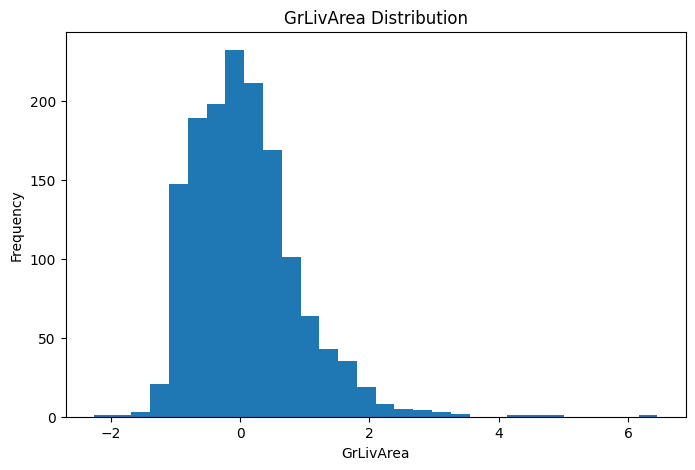

In [6]:
# dagılımına ve aykırı deger durumuna bakmak istiyorum hangi scaler'ı kullanacağıma karar vermek için.

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["GrLivArea"], bins=30)
plt.title("GrLivArea Distribution")
plt.xlabel("GrLivArea")
plt.ylabel("Frequency")
plt.show()

# Sağa çarpık.

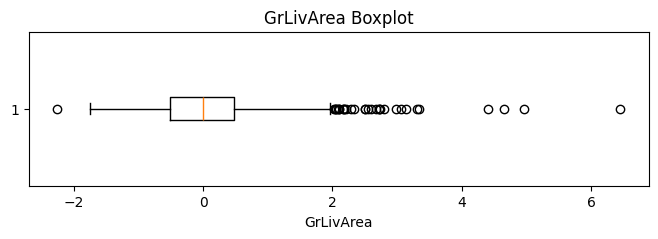

In [11]:
plt.figure(figsize=(8, 2))
plt.boxplot(df["GrLivArea"], vert=False)
plt.title("GrLivArea Boxplot")
plt.xlabel("GrLivArea")
plt.show()

#aykırı değerler var.Bir de mesafe bazlı algoritma kullanacağım. Bu yüzden robust scalar uygun.
# Sonra log(GrLivArea) + KNN de deneyebilirim, hangisi daha iyi sonuç verirse onu kullanabilirim.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Feature / target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Data Pipeline
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsRegressor())
])

scores = cross_val_score(
    pipe,
    X,
    y,
    cv=5,
    scoring="r2"
)

rescaled_score = scores.mean()
rescaled_score



np.float64(0.6464441119471763)

👉 R2 skoru artmış olmalı!

💡 Mesafe tabanlı algoritmaları modellerken özelliklerin tam ortak aralıkta olması tercih edilir.  
Ancak, her zaman daha iyi bir skor garanti etmez.  
Bu bir deneme yanılma sürecidir.

### 🧪 Kodunuzu kontrol edin

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.42s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# $k$ Optimizasyonu

👇 Yeniden ölçeklendirilmiş özellikler üzerinde bir KNNRegressor'ın K parametresini (`n_neighbors` parametresini kullanarak) ince ayarlayın. K 1'den 25'e kadar arttıkça skorun evrimini çizin.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

k_values = range(1, 26)
cv_scores = []

for k in k_values:
    pipe = Pipeline([
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=k))
    ])
    
    scores = cross_val_score(
        pipe,
        X,
        y,
        cv=5,
        scoring="r2"
    )
    
    cv_scores.append(scores.mean())

cv_scores


[np.float64(0.48781524084482514),
 np.float64(0.6261558192767057),
 np.float64(0.6314137777444113),
 np.float64(0.6392125256011214),
 np.float64(0.6464441119471763),
 np.float64(0.6501202679466124),
 np.float64(0.6529797595619609),
 np.float64(0.6524070638914402),
 np.float64(0.6544413086087285),
 np.float64(0.650711990671359),
 np.float64(0.6530892887772707),
 np.float64(0.654088987455692),
 np.float64(0.6531365475914865),
 np.float64(0.6535749523982085),
 np.float64(0.649912272094315),
 np.float64(0.6501960764474763),
 np.float64(0.6471779325681164),
 np.float64(0.6451439253895215),
 np.float64(0.6421252156480237),
 np.float64(0.64233212807016),
 np.float64(0.6404460603253788),
 np.float64(0.6392071715639032),
 np.float64(0.6373460651567779),
 np.float64(0.6352527840493888),
 np.float64(0.6339931586951949)]

❓ K'nın hangi değeri en iyi performansı üretir? Cevabınızı `best_k` değişken adı altında kaydedin.

In [29]:
best_k = k_values[cv_scores.index(max(cv_scores))]
best_k, max(cv_scores)

(9, np.float64(0.6544413086087285))

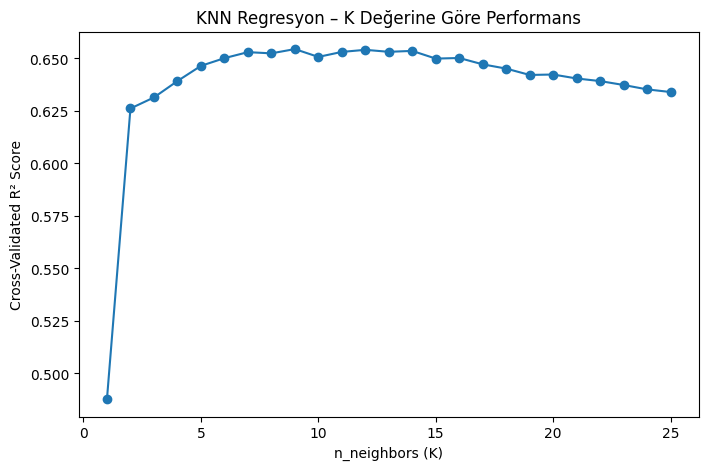

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("n_neighbors (K)")
plt.ylabel("Cross-Validated R² Score")
plt.title("KNN Regresyon – K Değerine Göre Performans")
plt.show()


<details>
<summary> 👉 Çözüm 👈</summary>
    
Grafiğinize bakarak, skorun k = 5 civarında artmayı durdurduğunu ve maksimum skorun k = 11 için ulaşıldığını görmelisiniz.

</details>

❓ $k$ < 5 değerleri için modelin kötü performansını nasıl yorumluyorsunuz?

<details>
<summary> 👉 Çözüm 👈</summary>
    
K çok küçük olduğunda, model eğitim kümesine aşırı uyum gösterme eğiliminde olacaktır. İyi genelleştirebilmek için çok az noktaya odaklanacaktır. K'yı artırmak modele tahminlerini dayandıracağı daha fazla örnek verecektir.

</details>

### 🧪 Kodunuzu kontrol edin

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# KNN'de Aşırı Uyum

💡 KNN'lerin K parametresi çok küçük olduğunda, eğitim kümesine aşırı uyum gösterme ve iyi genelleştirememe riski vardır. 

👇 K=2 parametreli bir KNN'in öğrenme eğrilerini çizin.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=2))
])

train_sizes, train_scores, val_scores = learning_curve(
    pipe,
    X,
    y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Ortalama skorlar
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

print(f"train_mean is {train_mean}")
print(f"val_mean is {val_mean}")


train_mean is [0.88156419 0.85426671 0.84924422 0.8449029  0.85398241 0.85112516
 0.85459413 0.86085589 0.85898659 0.86329375]
val_mean is [0.49008959 0.54159202 0.53581148 0.51842958 0.55044965 0.5804582
 0.59892372 0.60102377 0.61513731 0.62615582]


👉 Yüksek eğitim skoru ama düşük test skoru gözlemlemelisiniz. ⚠️ Aşırı uyum uyarısı ⚠️ Bu çok düşük K parametresinden kaynaklanır.

# İdeal K

👇 Bu sefer, "$k$ Optimizasyonu" bölümünde bulduğunuz ideal K değeri için öğrenme eğrilerini çizin.

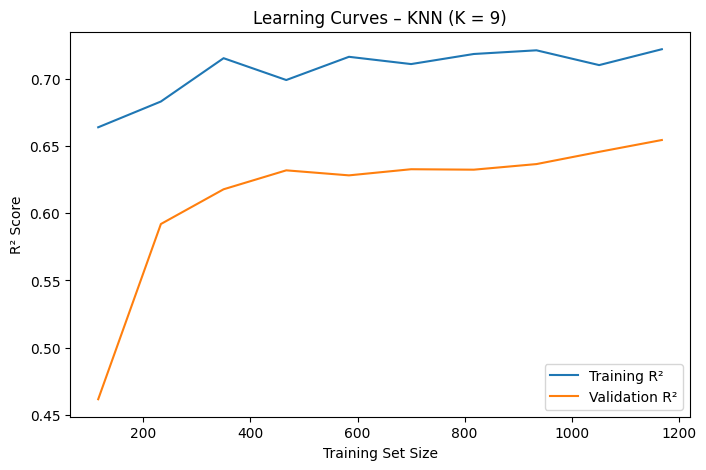

In [38]:
# İdeal k 9 bulmuştum ben

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=9))
])

train_sizes, train_scores, val_scores = learning_curve(
    pipe,
    X,
    y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Ortalama skorlar
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training R²")
plt.plot(train_sizes, val_mean, label="Validation R²")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curves – KNN (K = 9)")
plt.legend()
plt.show()



👉 Eğriler yakınsamaya yakın olmalı, bu da modelin daha az aşırı uyum gösterdiğini ve daha iyi genelleştirdiğini gösterir.

# Yorum
K=9 için çizilen öğrenme eğrileri, eğitim ve doğrulama skorlarının birbirine yakın ve paralel seyrettiğini göstermektedir. 
Doğrulama skorunun veri miktarıyla birlikte artması ve eğitim skoruna yaklaşması, modelin aşırı uyum göstermediğini ve iyi bir genelleme performansına sahip olduğunu göstermektedir. 
Bu durum, K optimizasyonu sonucunda seçilen değerin uygun olduğunu doğrulamaktadır. 
Validation eğrisi de platoya oturmamış, Daha fazla veri gelse performans biraz daha artabilir.

💡 KNN modelleriyle modelleme yaparken hatırlanması gereken iki temel unsur vardır:  
    1. Mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlıdır  
    2. K ayarlanmalıdır: performans, genelleştirme ve aşırı uyum arasındaki dengeyi kontrol eder

❓ Optimize edilmiş KNN modelinin gerçek fiyat ile tahmin edilen fiyat arasındaki ortalama fark nedir? Cevabınızı hesaplayın ve `price_error` değişken adı altında kaydedin

<details>
<summary> 💡 İpucu </summary>
    
Hesaplamanız gereken metrik **Negatif Ortalama Mutlak Hata (MAE)**'dır.

</details>

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=9))
])

scores = cross_val_score(
    pipe,
    X,
    y,
    cv=5,
    scoring="neg_mean_absolute_error"
)

price_error = scores.mean()
price_error


np.float64(-30893.59802130898)

### 🧪 Kodunuzu kontrol edin

In [40]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Seçimi

❓ Ev fiyatlarını tahmin etme görevini gerçekleştirmek için bu iki modelden hangisini seçersiniz:
- Az önce ayarladığınız KNN modeli
- Bir Linear Regression modeli

Cevabınızı "KNN" veya "LinearReg" olarak `best_model` değişken adı altında string olarak kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
Hangisini seçeceğinize karar vermek için, aynı görev üzerinde bir Linear Regression skorunu değerlendirmeniz ve KNN'in skoruyla karşılaştırmanız gerekecek. Aynı metrikleri karşılaştırdığınızdan emin olun!!

</details>

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

lin_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("lr", LinearRegression())
])

lin_scores = cross_val_score(
    lin_pipe,
    X,
    y,
    cv=5,
    scoring="neg_mean_absolute_error"
)

linear_price_error = lin_scores.mean()
linear_price_error

best_model = "KNN"


💡 Her iki modelin metriklerini karşılaştırdığınızda, KNN modeli Linear Regression'ı geçmelidir. Bu, verideki doğrusal olmayan kalıpları yakalama yeteneğinden kaynaklanabilir.

### 🧪 Kodunuzu kontrol edin

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D1-S-data-knn/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁